# 데이터 탐색하기
---

<br>

## 라이브러리

In [1]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
sns.set(font="THEGaeideuk",rc={"axes.unicode_minus":False},style='white')

<br>

## 데이터 불러오기 

In [2]:
# 시스템에 발생한 에러 로그
err=pd.read_csv('./data/train_err_data.csv')
err

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,20201101025616,model_3,05.15.2138,15,1
1,10000,20201101030309,model_3,05.15.2138,12,1
2,10000,20201101030309,model_3,05.15.2138,11,1
3,10000,20201101050514,model_3,05.15.2138,16,1
4,10000,20201101050515,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
16554658,24999,20201130163051,model_3,05.15.2138,15,1
16554659,24999,20201130172625,model_3,05.15.2138,16,1
16554660,24999,20201130172625,model_3,05.15.2138,4,0
16554661,24999,20201130172631,model_3,05.15.2138,4,0


In [120]:
err['fwver'].unique()

array(['05.15.2138', '04.33.1185', '04.33.1261', '04.22.1750',
       '04.22.1778', '04.16.3553', '04.33.1149', '04.16.3571',
       '05.66.3237', '05.66.3571', '03.11.1149', '04.22.1684',
       '03.11.1167', '04.82.1684', '04.82.1778', '04.33.1171',
       '04.73.2237', '10', '04.82.1730', '04.73.2571', '8.5.3',
       '04.22.1666', '03.11.1141', '05.15.2120', '04.33.1125',
       '04.16.3439', '04.22.1442', '04.33.1095', '04.16.3569',
       '05.15.2090', '05.15.3104', '05.15.2122', '04.22.1656',
       '04.16.2641', '05.15.2114', '04.16.3345', '05.15.2092'],
      dtype=object)

In [87]:
err['time']=pd.to_datetime(err['time'],format='%Y%m%d%H%M%S')

In [95]:
# 시간 단위로 내릴려면...
err.loc[0:10]['time'].dt.floor('H')

0    2020-11-01 02:00:00
1    2020-11-01 03:00:00
2    2020-11-01 03:00:00
3    2020-11-01 05:00:00
4    2020-11-01 05:00:00
5    2020-11-01 05:00:00
6    2020-11-01 05:00:00
7    2020-11-01 06:00:00
8    2020-11-01 17:00:00
9    2020-11-01 17:00:00
10   2020-11-01 17:00:00
Name: time, dtype: datetime64[ns]

In [119]:
a=err['fwver'].unique()
b=quality['fwver'].unique()
a[~np.isin(a,b)]

array(['04.33.1171', '10', '04.82.1730', '8.5.3', '03.11.1141',
       '04.33.1095', '04.16.3569', '05.15.2090', '05.15.3104',
       '04.16.2641', '05.15.2092'], dtype=object)

In [118]:
print(a)
print(b)

['05.15.2138' '04.33.1185' '04.33.1261' '04.22.1750' '04.22.1778'
 '04.16.3553' '04.33.1149' '04.16.3571' '05.66.3237' '05.66.3571'
 '03.11.1149' '04.22.1684' '03.11.1167' '04.82.1684' '04.82.1778'
 '04.33.1171' '04.73.2237' '10' '04.82.1730' '04.73.2571' '8.5.3'
 '04.22.1666' '03.11.1141' '05.15.2120' '04.33.1125' '04.16.3439'
 '04.22.1442' '04.33.1095' '04.16.3569' '05.15.2090' '05.15.3104'
 '05.15.2122' '04.22.1656' '04.16.2641' '05.15.2114' '04.16.3345'
 '05.15.2092']
['05.15.2138' '04.22.1750' '04.16.3553' '04.33.1261' '04.22.1778'
 '04.33.1185' '04.16.3571' '05.66.3571' '03.11.1149' '03.11.1167'
 '04.82.1684' '04.82.1778' '04.33.1149' '0' '05.66.3237' '04.73.2237'
 '09.17.1431' '04.22.1684' '05.15.2120' '04.33.1125' '05.15.2122'
 '04.22.1666' '04.22.1656' '04.16.3439' '04.73.2571' '05.15.2114'
 '04.16.3345' '04.22.1442']


In [98]:
tmp=err['time'].value_counts()[err['time'].value_counts()>=100].index
tmp=tmp.map(lambda x: x.floor('H'))

In [104]:
tmp_df=quality[quality['time'].isin(tmp)]

(array([1308.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          24.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

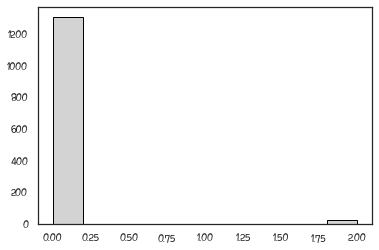

In [115]:
plt.hist(tmp_df['quality_12'],color = "lightgrey", edgecolor = "black")

In [80]:
err.groupby(['user_id']).count().sort_values(by='time')

,time,model_nm,fwver,errtype,errcode
user_id,,,,,
15605,1,1,1,1,1
21076,1,1,1,1,1
12367,1,1,1,1,1
12470,1,1,1,1,1
13525,1,1,1,1,1
...,...,...,...,...,...
11041,66093,66093,66093,66093,66093
20352,83680,83680,83680,83680,83680
15570,175730,175730,175730,175730,175730


In [3]:
err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 6 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   time      int64 
 2   model_nm  object
 3   fwver     object
 4   errtype   int64 
 5   errcode   object
dtypes: int64(3), object(3)
memory usage: 757.8+ MB


In [4]:
err.isna().sum()

user_id     0
time        0
model_nm    0
fwver       0
errtype     0
errcode     1
dtype: int64

- 에러 데이터에서는 **errcode** 컬럼만 NaN값이 하나 존재

In [5]:
err[err['errcode'].isna()]

,user_id,time,model_nm,fwver,errtype,errcode
3825744,13639,20201121191718,model_2,04.33.1261,5,NaN


<br>

### 각 컬럼별 unique values 보기

In [6]:
# model의 이름
err['model_nm'].unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

- 0~8로 총 9개의 모델이 존재

In [7]:
# Firmware Version 데이터
err['fwver'].unique()

array(['05.15.2138', '04.33.1185', '04.33.1261', '04.22.1750',
       '04.22.1778', '04.16.3553', '04.33.1149', '04.16.3571',
       '05.66.3237', '05.66.3571', '03.11.1149', '04.22.1684',
       '03.11.1167', '04.82.1684', '04.82.1778', '04.33.1171',
       '04.73.2237', '10', '04.82.1730', '04.73.2571', '8.5.3',
       '04.22.1666', '03.11.1141', '05.15.2120', '04.33.1125',
       '04.16.3439', '04.22.1442', '04.33.1095', '04.16.3569',
       '05.15.2090', '05.15.3104', '05.15.2122', '04.22.1656',
       '04.16.2641', '05.15.2114', '04.16.3345', '05.15.2092'],
      dtype=object)

- 여러가지 Firmware Version이 존재

In [8]:
# 에러 타입
np.sort(err['errtype'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42], dtype=int64)

- 에러 타입은 1~42까지 **41개**의 에러 타입이 존재
- 29번 type은 존재 X

In [9]:
# 에러 코드
len(err['errcode'].unique())

2806

- 에러 코드는 2806개가 존재한다.

In [10]:
err['errcode'].value_counts()

1                     8906967
0                     2599123
connection timeout    1835600
B-A8002                897863
80                     334018
                       ...   
4514                        1
4008                        1
3508                        1
6663                        1
9906                        1
Name: errcode, Length: 2805, dtype: int64

In [11]:
err['errcode'].value_counts(normalize=True).cumsum()[:20]

1                               0.538034
0                               0.695036
connection timeout              0.805917
B-A8002                         0.860154
80                              0.880330
79                              0.900411
14                              0.916332
active                          0.929575
2                               0.939626
84                              0.947471
85                              0.955188
standby                         0.961855
NFANDROID2                      0.968145
connection fail to establish    0.974243
3                               0.979753
90                              0.983739
89                              0.987654
S-61001                         0.989746
95                              0.991162
94                              0.992498
Name: errcode, dtype: float64

- **errocode**는 상위 20개의 code가 99%이상 차지한다.

In [12]:
# 시스템 퀄리티 로그
quality=pd.read_csv('./data/train_quality_data.csv')
quality

C:\Users\won\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,20201129090000,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828619,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,1,0,0,0,0,17,0,0
828620,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0
828621,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,3,0,0,0,0,17,0,0
828622,20201124033000,24997,04.22.1778,0.0,0,0.0,0,0,0,0,0,0,0,17,0,0


In [13]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        828624 non-null  int64  
 1   user_id     828624 non-null  int64  
 2   fwver       788544 non-null  object 
 3   quality_0   684192 non-null  float64
 4   quality_1   828624 non-null  int64  
 5   quality_2   788511 non-null  float64
 6   quality_3   828624 non-null  int64  
 7   quality_4   828624 non-null  int64  
 8   quality_5   828604 non-null  object 
 9   quality_6   828624 non-null  int64  
 10  quality_7   828624 non-null  object 
 11  quality_8   828624 non-null  object 
 12  quality_9   828624 non-null  object 
 13  quality_10  828624 non-null  object 
 14  quality_11  828624 non-null  int64  
 15  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 101.2+ MB


- **fwver**, **quality_0**, **quality_2**,**quality_5** 데이터만 NaN값존재

In [69]:
quality['quality_10'].value_counts()

3        99828
2        81732
0        59028
1        58152
4        54948
         ...  
57027       12
1240        12
6536        12
2777        12
2047        12
Name: quality_10, Length: 4200, dtype: int64

In [101]:
quality['time']=pd.to_datetime(quality['time'],format='%Y%m%d%H%M%S')

In [16]:
quality['quality_7']=quality['quality_7'].astype('str')
quality['quality_8']=quality['quality_8'].astype('str')
quality['quality_9']=quality['quality_9'].astype('str')

In [17]:
# str 타입의 quality 컬럼들은 int형으로 바꿔준다.
# 이때 NaN 값은 데이터 보기위해 우선은 0으로 처리한다.quality_0, quality_2,quality_5
quality=quality.fillna('0')
quality['quality_5']=quality['quality_5'].str.replace(',','').astype('int')
quality['quality_7']=quality['quality_7'].str.replace(',','').astype('int')
quality['quality_8']=quality['quality_8'].str.replace(',','').astype('int')
quality['quality_9']=quality['quality_9'].str.replace(',','').astype('int')
quality['quality_10']=quality['quality_10'].str.replace(',','').astype('int')

In [18]:
quality.describe()

,time,user_id,quality_1,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
count,8.286240e+05,828624.000000,828624.000000,828624.0,828624.0,828624.000000,828624.000000,828624.000000,828624.000000,828624.000000,8.286240e+05,828624.000000,828624.000000
mean,2.020112e+13,17574.678315,-0.171782,0.0,0.0,74.531372,2.043391,26.744106,0.163732,56.344233,8.965973e+02,-0.181638,0.045878
std,8.863638e+06,4374.113554,0.692386,0.0,0.0,2278.634120,32.695380,317.874778,5.154260,3280.350150,1.652103e+04,0.397767,0.302452
min,2.020103e+13,10000.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000
25%,2.020111e+13,13685.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
50%,2.020112e+13,17597.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+00,0.000000,0.000000
75%,2.020112e+13,21423.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,0.000000,0.000000
max,2.020113e+13,24997.000000,171.000000,0.0,0.0,637385.000000,600.000000,7200.000000,1317.000000,397424.000000,1.910175e+06,14.000000,14.000000


(array([1.53649e+05, 6.70270e+05, 2.56700e+03, 1.14000e+03, 3.91000e+02,
        2.02000e+02, 1.34000e+02, 7.10000e+01, 5.00000e+01, 3.50000e+01,
        2.60000e+01, 2.40000e+01, 1.20000e+01, 7.00000e+00, 6.00000e+00,
        5.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00, 5.00000e+00]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19]),
 <BarContainer object of 20 artists>)

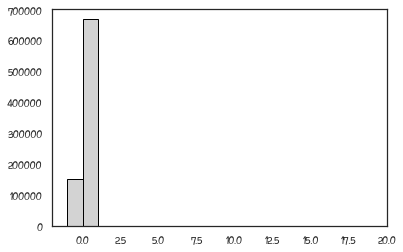

In [28]:
# 데이터의 분포도 보기

#grid setting
grid_list = [i for i in range(-1, 20)]

# 2-2. plotting
plt.hist(quality['quality_1'],grid_list,color = "lightgrey", edgecolor = "black")

(array([8.28481e+05, 1.02000e+02, 3.10000e+01, 2.00000e+00, 4.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([-1.000000e+00,  6.373760e+04,  1.274762e+05,  1.912148e+05,
         2.549534e+05,  3.186920e+05,  3.824306e+05,  4.461692e+05,
         5.099078e+05,  5.736464e+05,  6.373850e+05]),
 <BarContainer object of 10 artists>)

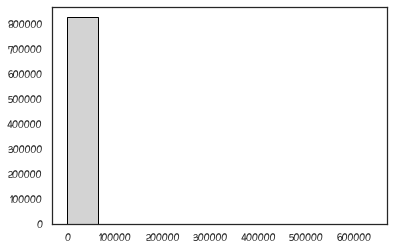

In [23]:
# 2-2. plotting
plt.hist(quality['quality_5'],color = "lightgrey", edgecolor = "black")

(array([0.00000e+00, 8.01156e+05, 2.08800e+04, 4.52400e+03, 1.32000e+03,
        3.12000e+02, 1.92000e+02, 1.08000e+02, 2.40000e+01, 4.80000e+01,
        0.00000e+00, 1.20000e+01, 1.20000e+01, 1.20000e+01, 1.20000e+01,
        1.20000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

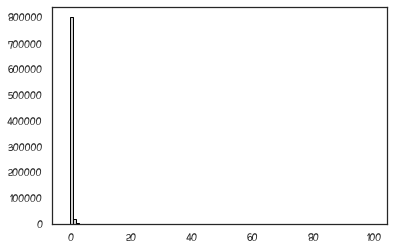

In [77]:
grid_list = [i for i in range(-1, 100)]
plt.hist(quality['quality_12'],grid_list,color = "lightgrey", edgecolor = "black")

In [67]:
(quality['quality_5']>100).sum()

28123

(array([8.28168e+05, 1.68000e+02, 1.08000e+02, 7.20000e+01, 2.40000e+01,
        6.00000e+01, 1.20000e+01, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([      0. ,  191017.5,  382035. ,  573052.5,  764070. ,  955087.5,
        1146105. , 1337122.5, 1528140. , 1719157.5, 1910175. ]),
 <BarContainer object of 10 artists>)

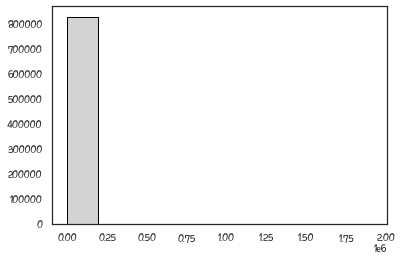

In [25]:
# 2-2. plotting
plt.hist(quality['quality_10'],color = "lightgrey", edgecolor = "black")

(array([    0., 59028., 58152., 81732., 99828., 54948., 40812., 32220.,
        24036., 19212., 15756., 12600., 11916., 10308.,  8604.,  7584.,
         7368.,  6240.,  5364.,  5784.,  4800.,  4488.,  4764.,  4044.,
         3984.,  3588.,  3228.,  3396.,  3060.,  3012.,  2880.,  2508.,
         2436.,  2220.,  1920.,  2028.,  1860.,  1692.,  2100.,  1788.,
         1536.,  1476.,  1452.,  1404.,  1284.,  1404.,  1392.,  1596.,
         1452.,  1416.,  1056.,  1296.,  1332.,  1152.,  1020.,  1260.,
         1320.,  1080.,  1164.,  1068.,  1056.,   996.,   888.,  1080.,
          996.,   972.,   840.,   804.,   780.,   876.,   864.,   720.,
          900.,   912.,  1068.,   780.,   948.,   816.,   696.,   768.,
          792.,   756.,   696.,   756.,   720.,   660.,   624.,   672.,
          840.,   756.,   624.,   540.,   672.,   576.,   564.,   720.,
          588.,   624.,   552.,  1212.]),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18

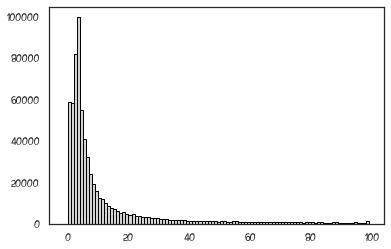

In [66]:
# 2-2. plotting
grid_list = [i for i in range(-1, 100)]
plt.hist(quality['quality_10'],grid_list,color = "lightgrey", edgecolor = "black")

In [ ]:
# 2-2. plotting
plt.hist(quality['quality_6'],color = "lightgrey", edgecolor = "black")

<br>

### 각 데이터의 점수가 100이상인 데이터.

In [63]:
print((quality['quality_1']>100).sum())
print((quality['quality_2']>100).sum())
print((quality['quality_3']>100).sum())
print((quality['quality_4']>100).sum())
print((quality['quality_5']>100).sum())
print((quality['quality_6']>100).sum())
print((quality['quality_7']>100).sum())
print((quality['quality_8']>100).sum())
print((quality['quality_9']>100).sum())
print((quality['quality_10']>100).sum())
print((quality['quality_11']>100).sum())
print((quality['quality_12']>100).sum())

8
1293
0
0
28123
3705
16980
24
7272
148896
0
0


In [40]:
quality['fwver'].unique()

array(['05.15.2138', '04.22.1750', '04.16.3553', '04.33.1261',
       '04.22.1778', '04.33.1185', '04.16.3571', '05.66.3571',
       '03.11.1149', '03.11.1167', '04.82.1684', '04.82.1778',
       '04.33.1149', nan, '05.66.3237', '04.73.2237', '09.17.1431',
       '04.22.1684', '05.15.2120', '04.33.1125', '05.15.2122',
       '04.22.1666', '04.22.1656', '04.16.3439', '04.73.2571',
       '05.15.2114', '04.16.3345', '04.22.1442'], dtype=object)

In [39]:
np.isin(quality['fwver'].unique(),err['fwver'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [89]:
err['fwver'].unique()[~np.isin(err['fwver'].unique(),quality['fwver'].unique())]

array(['04.33.1171', '10', '04.82.1730', '8.5.3', '03.11.1141',
       '04.33.1095', '04.16.3569', '05.15.2090', '05.15.3104',
       '04.16.2641', '05.15.2092'], dtype=object)

- '09.17.1431' 데이터는 err['fwver']에는 없는 펌웨어 버전

In [38]:
# 사용자 불만 및 불만이 접수된 시간
problem=pd.read_csv('./data/train_problem_data.csv')
problem

,user_id,time
0,19224,20201102200000
1,23664,20201116140000
2,15166,20201114130000
3,12590,20201108210000
4,15932,20201103210000
...,...,...
5424,20167,20201125120000
5425,16270,20201110120000
5426,19114,20201106230000
5427,21505,20201104110000


In [39]:
# 불만을 접수한 user_id의 개수
len(problem['user_id'].unique())

5000

In [40]:
problem['user_id'].value_counts()

24407    5
11016    4
20636    4
11528    4
24138    4
        ..
19613    1
19739    1
13596    1
15645    1
14311    1
Name: user_id, Length: 5000, dtype: int64

- 가장 많은 불만을 접수한 건수는 5건이 된다.
- 대부분 중복으로 많은 접수를 하지 않음.

In [41]:
problem['time'].max()

20201130230000

In [42]:
problem['time'].min()

20201101000000

In [46]:
pd.to_datetime?

In [49]:
problem['time']=pd.to_datetime(problem['time'],format='%Y%m%d%H%M%S')

In [84]:
dt_index = pd.date_range(start='20201101000000', end='20201130230000')

In [85]:
dt_index

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-07', '2020-11-08',
               '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
               '2020-11-13', '2020-11-14', '2020-11-15', '2020-11-16',
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-21', '2020-11-22', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-28',
               '2020-11-29', '2020-11-30'],
              dtype='datetime64[ns]', freq='D')

(array([ 70., 280., 190., 197., 189., 195.,  84.,  59., 256., 220., 225.,
        188., 194.,  98.,  57., 246., 188., 216., 233., 252., 133.,  78.,
        263., 211., 230., 199., 212., 116.,  67.]),
 array([18567., 18568., 18569., 18570., 18571., 18572., 18573., 18574.,
        18575., 18576., 18577., 18578., 18579., 18580., 18581., 18582.,
        18583., 18584., 18585., 18586., 18587., 18588., 18589., 18590.,
        18591., 18592., 18593., 18594., 18595., 18596.]),
 <BarContainer object of 29 artists>)

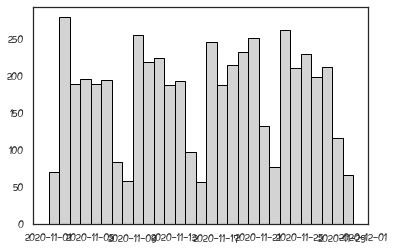

In [86]:
#grid_list = [i for i in range(20201101000000, 20201130230000,10000)]
plt.hist(problem['time'],dt_index,color = "lightgrey", edgecolor = "black")